## Drug Dataset

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
df = pd.read_csv('drug.csv')
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(200, 6)

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

C:\Users\Bryan Russel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

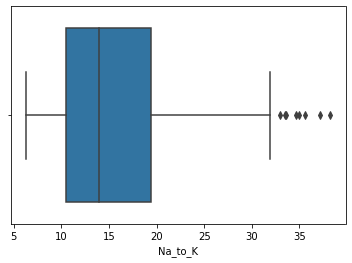

In [8]:
sns.boxplot(df['Na_to_K'])

In [9]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
def remove_Outliers(col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;

C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_2992\779143160.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] < min_] = min_;
C:\Users\Bryan Russel\AppData\Local\Temp\ipykernel_2992\779143160.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] > max_] = max_;


<AxesSubplot:xlabel='Na_to_K'>

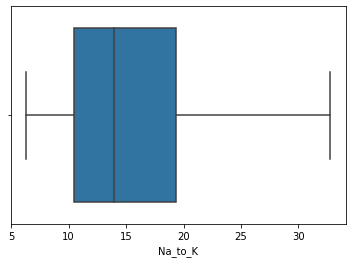

In [11]:
remove_Outliers('Na_to_K');
sns.boxplot(x=df['Na_to_K'])

In [12]:
from sklearn.preprocessing import LabelEncoder 

In [13]:
encoder = LabelEncoder();
df_new = df.copy();

In [14]:
for col in df_new.columns:
    if(col != 'Drug'):
        df_new[col] = encoder.fit_transform(df_new[col]);

In [15]:
df_new['Drug'] = df_new['Drug'].map({'DrugY':0,'drugX':1,'drugA':2,'drugC':3,'drugB':4})

In [16]:
df_new

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,0
1,30,1,1,0,89,3
2,30,1,1,0,43,3
3,12,0,2,0,10,1
4,44,0,1,0,133,0
...,...,...,...,...,...,...
195,39,0,1,0,69,3
196,1,1,1,0,75,3
197,35,1,2,0,36,1
198,8,1,2,1,102,1


In [17]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy();
scaler = MinMaxScaler();

In [18]:
for col in df_scaled.columns:
    if(col != 'Drug'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [19]:
df_scaled

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.142857,0.0,0.0,0.0,0.878947,0
1,0.535714,1.0,0.5,0.0,0.468421,3
2,0.535714,1.0,0.5,0.0,0.226316,3
3,0.214286,0.0,1.0,0.0,0.052632,1
4,0.785714,0.0,0.5,0.0,0.700000,0
...,...,...,...,...,...,...
195,0.696429,0.0,0.5,0.0,0.363158,3
196,0.017857,1.0,0.5,0.0,0.394737,3
197,0.625000,1.0,1.0,0.0,0.189474,1
198,0.142857,1.0,1.0,1.0,0.536842,1


<AxesSubplot:>

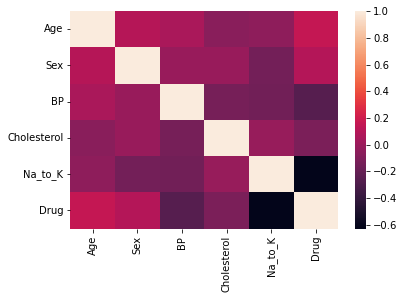

In [20]:
sns.heatmap(df_scaled.corr())

In [21]:
corr = df_scaled.corr();
corr_mask =corr.mask(np.triu(np.ones_like(corr, dtype = bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending=False);
corr_df=pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [22]:
corr_df

,,0


In [23]:
X = df_scaled.drop(['Drug'],axis = 1);
y = df_scaled['Drug'];

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=.80,stratify=y)

In [26]:
print(X_train.shape);
print(X_test.shape);

(160, 5)
(40, 5)


In [27]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [28]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

def evaluate_model(model):
    print(classification_report(y_test, model.predict(X_test),target_names=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']))
    plot_confusion_matrix(model, X_test, y_test, display_labels=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
    print('Training Score:', model.score(X_train,y_train))
    print('Test score:', model.score(X_test,y_test))

#### Gaussian Naive Bayes

              precision    recall  f1-score   support

       DrugY       1.00      0.61      0.76        18
       drugC       1.00      1.00      1.00        11
       drugX       0.83      1.00      0.91         5
       drugA       0.38      1.00      0.55         3
       drugB       0.75      1.00      0.86         3

    accuracy                           0.82        40
   macro avg       0.79      0.92      0.81        40
weighted avg       0.91      0.82      0.84        40

Training Score: 0.75625
Test score: 0.825


C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


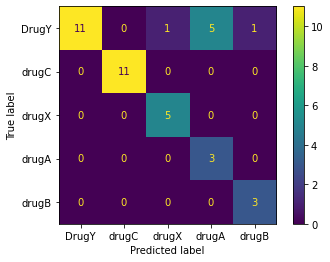

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train);
gnb.score(X_test,y_test);

evaluate_model(gnb)

#### Decision Tree Classifier

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        18
       drugC       1.00      1.00      1.00        11
       drugX       1.00      1.00      1.00         5
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Training Score: 1.0
Test score: 1.0


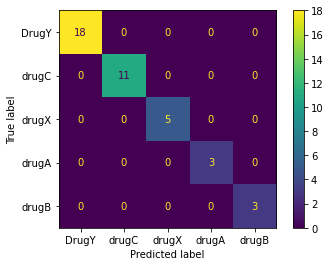

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier();
dt.fit(X_train,y_train);

evaluate_model(dt)

#### Bernoulli NB

C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan Russel\anaconda3\li

              precision    recall  f1-score   support

       DrugY       0.50      0.83      0.62        18
       drugC       0.70      0.64      0.67        11
       drugX       0.00      0.00      0.00         5
       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         3

    accuracy                           0.55        40
   macro avg       0.24      0.29      0.26        40
weighted avg       0.42      0.55      0.46        40

Training Score: 0.51875
Test score: 0.55


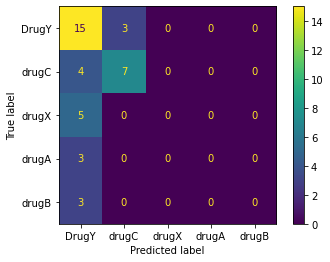

In [31]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()
bnb.fit(X_train,y_train);
bnb.score(X_test,y_test);
evaluate_model(bnb)

#### Random Tree Classifier

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        18
       drugC       1.00      1.00      1.00        11
       drugX       1.00      1.00      1.00         5
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Training Score: 1.0


C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test score: 1.0


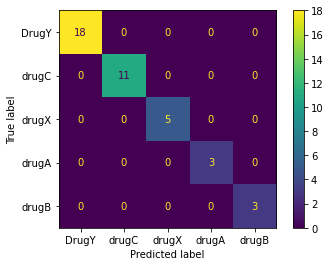

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();
rf.fit(X_train,y_train);

evaluate_model(rf)

#### K Nearest Neighbors Classifier

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        18
       drugC       1.00      1.00      1.00        11
       drugX       1.00      1.00      1.00         5
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Training Score: 1.0


C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test score: 1.0


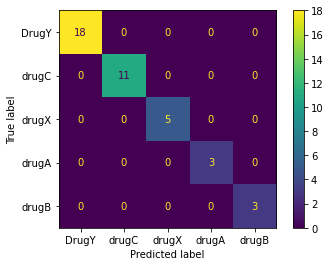

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();
rf.fit(X_train,y_train);

evaluate_model(rf)

#### Logistic Regression

              precision    recall  f1-score   support

       DrugY       0.77      0.94      0.85        18
       drugC       0.91      0.91      0.91        11
       drugX       1.00      1.00      1.00         5
       drugA       1.00      0.33      0.50         3
       drugB       1.00      0.33      0.50         3

    accuracy                           0.85        40
   macro avg       0.94      0.70      0.75        40
weighted avg       0.87      0.85      0.83        40

Training Score: 0.875
Test score: 0.85


C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


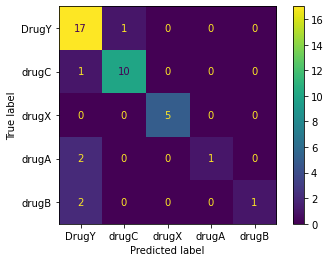

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
lr.fit(X_train,y_train);

evaluate_model(lr)

### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
from sklearn.tree import DecisionTreeClassifier
params = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','entropy'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(),params, n_iter=15, cv=10)
rsearch.fit(X_train,y_train)

C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Bryan Russel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 381, in fit
    splitter = SPLITTERS[self.splitter](
KeyError: 'entropy'

  warnings.w

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'entropy']})

In [38]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'entropy'}

In [39]:
dt_tuned = DecisionTreeClassifier(splitter='best', max_depth = 15, criterion = 'entropy');
dt_tuned.fit(X_train,y_train);
dt_tuned.score(X_test,y_test);

In [40]:
from sklearn.model_selection import cross_val_score;

scores = cross_val_score(dt_tuned,X_train,y_train, cv =13);
scores.mean()

0.9812623274161735

## Conclusion

As we can see the Gaussian Naive Bayes have 0.75 in training score and 0.82 in test score that means its underfitting. In Bernoulli NB have 0.51 training score and 0.55 in test score its too low to be chosen to be the best model. The Decision Tree Classifier, KNN Classifier and Random Forest Classifier have both 1.00 for test score and training score but the Decision Tree undergoes for Hyperparameter tuning which results in 0.98 but in the most realistic part is the Logistic Regression which it have training score of 0.87 and 0.85 in test score which can be considered as best model.